In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-06 17:10:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.01s   

2023-05-06 17:10:05 (764 KB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [2]:
from helper_functions import *

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [3]:
unzip_data('10_food_classes_10_percent.zip')

In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [5]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [6]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir, image_size=IMG_SIZE,
    label_mode='categorical', batch_size=BATCH_SIZE,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir, image_size=IMG_SIZE,
    label_mode='categorical', batch_size=BATCH_SIZE,
)

Found 750 files belonging to 10 classes.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 2500 files belonging to 10 classes.


In [7]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, labels in train_data.take(1):
    print(images, labels)

tf.Tensor(
[[[[244.77042  245.77042  239.77042 ]
   [234.31122  235.31122  229.31122 ]
   [240.43367  241.64796  236.64796 ]
   ...
   [243.85202  243.85202  243.85202 ]
   [244.5714   244.5714   242.5714  ]
   [248.1585   248.1585   246.1585  ]]

  [[245.       246.       240.      ]
   [235.7092   236.7092   230.7092  ]
   [238.94388  240.15816  235.15816 ]
   ...
   [241.28569  241.28569  241.28569 ]
   [241.92854  241.92854  239.92854 ]
   [246.2146   246.2146   244.2146  ]]

  [[245.14287  246.       241.35715 ]
   [234.28572  235.50002  230.50002 ]
   [238.35715  239.31123  234.44899 ]
   ...
   [241.42853  241.42853  241.42853 ]
   [241.65814  241.65814  239.65814 ]
   [246.57178  246.57178  244.57178 ]]

  ...

  [[246.85715  247.85715  241.85715 ]
   [231.05612  232.05612  226.05612 ]
   [240.78569  241.35712  235.57141 ]
   ...
   [241.78574  241.78574  241.78574 ]
   [241.7296   241.7296   241.7296  ]
   [246.78589  246.78589  246.78589 ]]

  [[248.37755  249.37755  243.3775

2023-05-06 17:10:14.123929: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
tf.random.set_seed(42)

# creating functional model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# not needed for efficientnet, already has rescaling in built
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)(inputs)

x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GolbalAveragePooling 2D: {x.shape}')

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model0 = tf.keras.Model(inputs, outputs)

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GolbalAveragePooling 2D: (None, 1280)


In [11]:
model0.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [12]:
history0 = model0.fit(
    train_data, epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub', 
                                           experiment_name='10_percent_feature_extraction')]
)

Saving TensorBoard log files to: tensorflow_hub/10_percent_feature_extraction/20230506-171016
Epoch 1/5
24/24 [==============================] - 9s 235ms/step - loss: 1.8187 - accuracy: 0.4693 - val_loss: 1.2607 - val_accuracy: 0.7632
Epoch 2/5
24/24 [==============================] - 5s 209ms/step - loss: 1.0757 - accuracy: 0.7800 - val_loss: 0.8576 - val_accuracy: 0.8405
Epoch 3/5
24/24 [==============================] - 4s 179ms/step - loss: 0.7870 - accuracy: 0.8320 - val_loss: 0.6784 - val_accuracy: 0.8520
Epoch 4/5
24/24 [==============================] - 4s 175ms/step - loss: 0.6445 - accuracy: 0.8467 - val_loss: 0.6046 - val_accuracy: 0.8717
Epoch 5/5
24/24 [==============================] - 4s 174ms/step - loss: 0.5518 - accuracy: 0.8733 - val_loss: 0.5417 - val_accuracy: 0.8635


In [13]:
model0.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 0.5516 - accuracy: 0.8660


[0.5515748858451843, 0.8660000562667847]

In [14]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [15]:
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


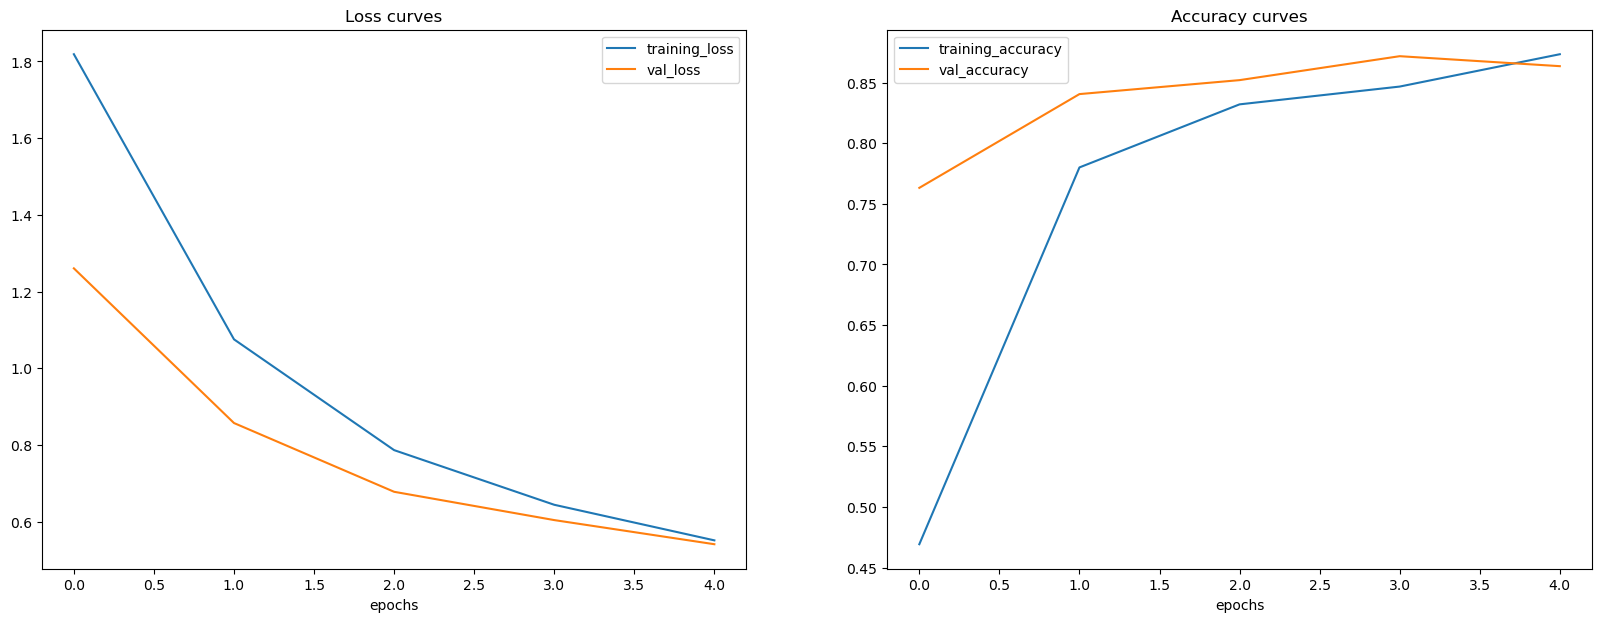

In [17]:
plot_loss_curves(history=history0)